In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.font_manager as fm



In [37]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False
sns.set_style({'font.family':'NanumGothic'})

In [38]:
plt.rcParams['font.family']='NanumGothic'

In [39]:
print(plt.rcParams['font.family'])

['NanumGothic']


In [40]:
df_raw = pd.read_csv("/home/piai/bigdata/data/Handling/FITNESS_결측.csv", engine='python',encoding='cp949')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [41]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [42]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [44]:
df_raw['GENDER'].fillna("여성",inplace = True)

In [45]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [46]:
df_count = df_raw["GENDER"].value_counts()
df_count

여성    16
남성    15
Name: GENDER, dtype: int64

In [47]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean") #aggregate

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [48]:
df_raw["WEIGHT"] = df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)

In [49]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [50]:
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

<AxesSubplot:>

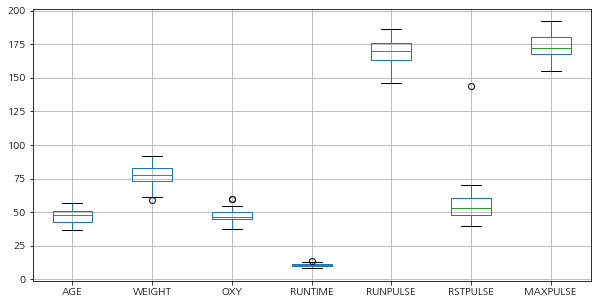

In [51]:
df_raw.boxplot(figsize = (10,5))

In [52]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    31 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    31 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [53]:
df_raw[df_raw["RSTPULSE"]>=100]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [54]:
df_fitness = df_raw[df_raw["RSTPULSE"]<100]
df_fitness # index가 28인놈 없어짐

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [55]:
df_fitness[df_fitness["RSTPULSE"]>=100] # 이상치가 제거된것을 확인할 수 있다.

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE


In [56]:
df_fitness.reset_index(drop= True , inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [57]:
df_fitness_num = df_fitness.select_dtypes(exclude = 'object') #numeric 변수만 뽑음
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [58]:
df_scale_std = scale(df_fitness_num)

In [59]:
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [60]:
df_scale_std.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [61]:
df_scale_minmax = minmax_scale(df_fitness_num)

In [62]:
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.279,0.979,0.000,0.50,0.000,0.459
1,0.05,0.700,1.000,0.078,0.60,0.267,0.838
2,0.30,0.822,0.746,0.082,0.25,0.167,0.351
3,0.65,0.362,0.760,0.128,0.00,0.267,0.000
4,0.60,0.717,0.519,0.133,0.85,0.133,0.811


In [63]:
df_scale_minmax.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [64]:
df_scale_robust = robust_scale(df_fitness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [65]:
df_rstpulse = pd.DataFrame()

df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head()



,Raw,Standard,MinMax,Robust
0,40,-1.856653,0.000000,-1.162791
1,48,-0.777726,0.266667,-0.418605
2,45,-1.182324,0.166667,-0.697674
3,48,-0.777726,0.266667,-0.418605
4,44,-1.317190,0.133333,-0.790698


In [66]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<AxesSubplot:title={'center':'MinMax'}>,
        <AxesSubplot:title={'center':'Raw'}>],
       [<AxesSubplot:title={'center':'Robust'}>,
        <AxesSubplot:title={'center':'Standard'}>]], dtype=object)

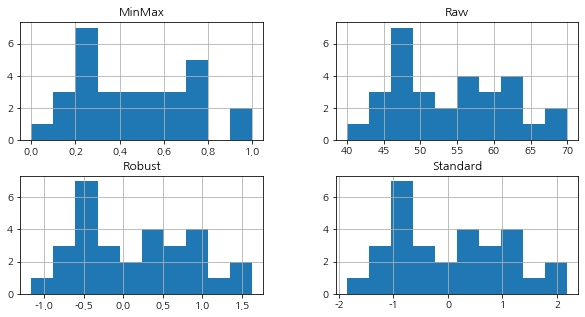

In [67]:
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize = (10, 5))

In [68]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# seaborn에서 한글깨짐 해결
plt.rcParams["axes.unicode_minus"] = False

df_fitness = pd.read_csv("/home/piai/bigdata/data/BigData/FITNESS.csv", engine="python", encoding="cp949")
df_fitness.head()


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

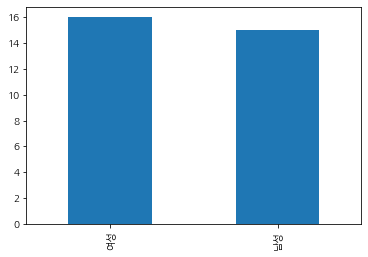

In [69]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

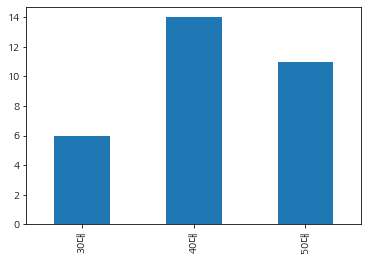

In [70]:
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER', ylabel='count'>

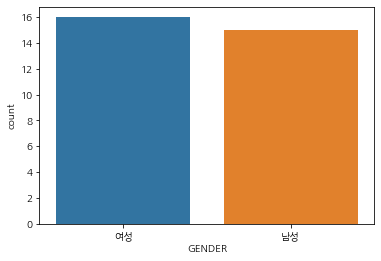

In [71]:
sns.countplot(x='GENDER', data = df_fitness)

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

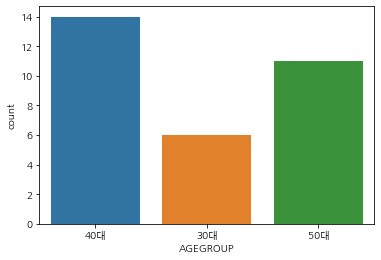

In [72]:
sns.countplot(x='AGEGROUP', data = df_fitness)

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

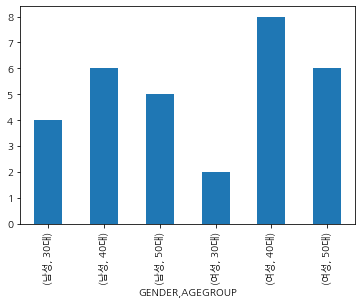

In [73]:
df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).size()
df_groupby_total.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

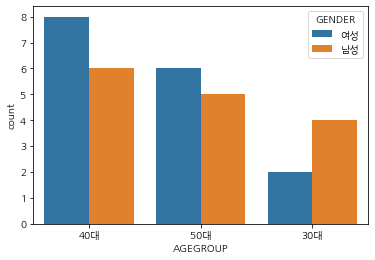

In [74]:
sns.countplot(x="AGEGROUP", hue="GENDER",
             data = df_fitness,
             order = df_fitness['AGEGROUP'].value_counts().index)

Text(486.5477272727271, 0.5, '혈당 산소 요구량')

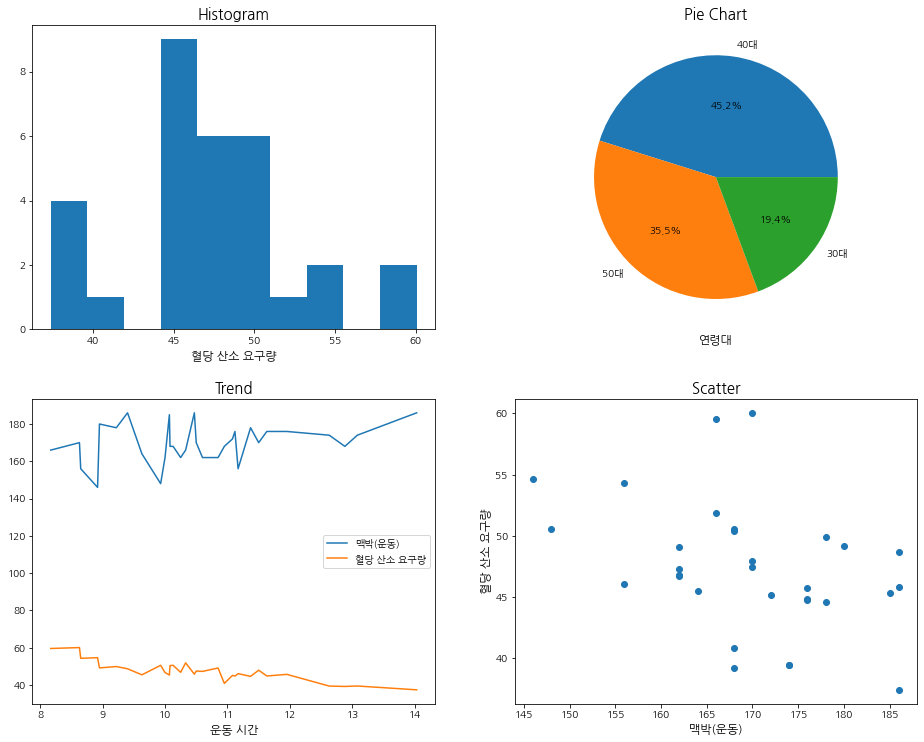

In [75]:
df_count = df_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

axes[0, 0].hist(df_fitness["OXY"])
axes[0, 0].set_title("Histogram", fontsize=15)
axes[0, 0].set_xlabel("혈당 산소 요구량", fontsize=12)

axes[0, 1].pie(df_count, labels=df_count.index.tolist(), autopct="%.1f%%")
axes[0, 1].set_title("Pie Chart", fontsize=15)
axes[0, 1].set_xlabel("연령대", fontsize=12)
axes[1, 0].plot("RUNTIME", "RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1, 0].plot("RUNTIME", "OXY", data=df_fitness, label="혈당 산소 요구량")
axes[1, 0].set_title("Trend", fontsize=15)
axes[1, 0].set_xlabel("운동 시간", fontsize=12)
axes[1, 0].legend()

axes[1, 1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1, 1].set_title("Scatter", fontsize=15)
axes[1, 1].set_xlabel("맥박(운동)", fontsize=12)
axes[1, 1].set_ylabel("혈당 산소 요구량", fontsize=12)
